# Welcome to the jupyter notebook for Ro-Vibrational Spectrscopy!
### Created April 2021: J. A. DePaolo-Boisvert

In [3]:
# Importing Packages which are like collections of code that groups of people will find useful
# Some packages are widely known and applied while others can be much more niche
import numpy as np #invokes numpy commands with np.command()
import scipy as sp
import scipy.constants as cons #constants is a submodule of scipy that we want easy access to
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
#If this cell rasies an error raise your hand

In [4]:
#Defining Constants
h = cons.Planck
kb = cons.Boltzmann
amutokg = 1.66E-27
evtojoule = 1.602176634E-19
temp = 300

In [5]:
#Define the diatomic molecule here
mass1 = 1.007825 *amutokg
mass2 = 36.965903 *amutokg
#H=1.007825, D=2.014102, Cl(35)=34.968853, and Cl(37)=36.965903

#Define bond strength (N/m)
k_force = 481

### 'From Physics we know that the vibrational frequency of a harmonic' oscillator is
$f = \frac{1}{2*\pi}*\sqrt{k/\mu}$

In [7]:
# First a small function to calculate the reduced mass of two bodies
# A more efficient method than
# def reduced_mass(m1, m2):
#     mu = (m1*m2)/(m1+m2)
#     return mu
# Is with lambda functions

reduced_mass = lambda m1, m2: (m1*m2)/(m1+m2)

mu = reduced_mass(mass1, mass2)
freq_vib = np.sqrt(k_force/mu)/(2*cons.pi)
freq_vib_wvnm = freq_vib/(cons.speed_of_light*100)
print(freq_vib, freq_vib_wvnm)

86494206749895.88 2885.136181441091


#### Explain in the markdown cell below the purpose of prefixes like np. and cons.

Your answer here

In [12]:
# Now a lambda function is written to generate the vibrational energy levels
# associated with the ground vibrational frequency previously calculated
# see equation 1 on pg 416

e_vib_levels = lambda base_freq, level : h*base_freq*(level+0.5)

#Lets say we want to see the frequencies of the first 10 energy levels
#of this oscillator
E_levels = e_vib_levels(freq_vib, np.arange(0,10)) #Note that this calls for the frequency in Hz
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

1442.5680907205458
4327.704272161637
7212.84045360273
10097.97663504382
12983.112816484912
15868.248997926004
18753.3851793671
21638.52136080819
24523.657542249282
27408.79372369037


In [13]:
# Now to calculate the rotational part
# this requires defining the internuclear distance r_nuc
r_nuc = 1.27E-10 #1.27 angstroms

# Since the reduced mass is known, the moment of inertia is readily calculable
mom_I = mu*(r_nuc**2)

e_rot_levels = lambda r_nuc, level: ((cons.h**2)/(8*(cons.pi**2)*mu*(r_nuc**2)))*(level*(level+1))

E_levels = e_rot_levels(r_nuc, np.arange(0,10))
#Now lets see the first 10 rotational energies
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

0.0
21.313601834225302
63.9408055026759
127.8816110053518
213.13601834225304
319.7040275133795
447.58563851873134
596.7808513583084
767.2896660321109
959.1120825401385


#### What are the units of the energies listed in the above to cells.

Your Answer Here

#### Based on equation 4 on page 417 of the text, The addition of several correctional factors yields a strong expression for the molecule's physical energy levels
$$
 T(\nu,J) = E_{vib} + E_{rot} + Anharm + Centri + Coupling
$$

$$
 T(\nu,J) = \nu_e(\nu+\frac{1}{2}) + B_eJ(J+1) + \nu_e\chi_e(\nu+\frac{1}{2})^2 - D_eJ^2(J+1)^2 - \alpha_e(\nu+\frac{1}{2})J(J+1)
$$

This equation has a total of 5 parameters, thus

$$
T(\nu,J) = T(\nu,J |\nu_e,\chi_e,B_e,D_e,\alpha_e)
$$

In [32]:
T_levels = lambda nu, J, nu_e, chi_e, B_e, D_e, a_e : (nu_e*(nu+0.5)) + B_e*J*(J+1) + nu_e*chi_e*(nu+0.5)**2 - D_e * J**2 * (J+1)**2 - a_e*(nu+0.5)*J*(J+1)

In [37]:
# Retrieve these values for HCl from NIST, and
# generate a matrix of the first 3 vibrational levels, by 5 rotational levels
# 
nu_e = 2990
chi_e = 52.8/nu_e
B_e = 10.59
D_e = 0.000532
a_e = 0.307
levels = np.array([[T_levels(i, j, nu_e, chi_e, B_e, D_e, a_e) for j in range(5)] for i in range(3)])

In [38]:
levels

array([[1508.2     , 1529.070872, 1570.799848, 1633.361392, 1716.7172  ],
       [4603.8     , 4624.056872, 4664.557848, 4725.277392, 4806.1772  ],
       [7805.      , 7824.642872, 7863.915848, 7922.793392, 8001.2372  ]])

## Selection Rules for spectroscopy
### Calculating energy levels is good, but the key to spectra is the transitions between energy levels
### Here is a summary of the selection rules:
#### $\Delta \nu$ = +/-1 and $\Delta J$ = +/-1


#### What is the meaning of $\nu$ and J? what is the meaning of changes in $\nu$ and J?

Your Answer Here

In [9]:
# Typically we are only concerned with vibrational transitions from 0, 1.
# Higher transitions do not typically occur at room temperature

def get_R_P_transitions(nu_e, chi_e, B_e, D_e, a_e):
  levels = np.array([[T_levels(i, j, nu_e, chi_e, B_e, D_e, a_e) for j in range(25)] for i in range(2)])
  #R_branch = nu + 1 and J + 1
  r_transitions = levels[1,1:] - levels[0,:-1]
  #P_branch = nu + 1 and J - 1
  p_transitions = levels[1,:-1] - levels[0,1:]
  return r_transitions, p_transitions


NameError: ignored

#### What is the difference between an R-type/R-branch transition and a P-type/P-branch transition?

Your Answer Here

#### How is it that R and P branch transitions are determined in this program?

Your Answer Here

Your Answer Here

In [ ]:
# Let's now come back to the population function
# We can populate an ensemble of molecules and see it's Rotational-Vibrational spectrum

#The defined energy matrix (ener_matrix) can be used to produce a population matrix
pop_matrix=np.ones((len(ener_matrix), len(ener_matrix[0])))
rot_probabilities = boltzmann_populate_levels(ener_matrix[0], temp)
vib_probabilities = boltzmann_populate_levels(ener_matrix[:,:1].flatten(), temp)
for i in range(len(vib_probabilities)):
    for j in range(len(rot_probabilities)):
        pop_matrix[i,j] = vib_probabilities[i]*rot_probabilities[j]
pop_matrix
#sum(sum(pop_matrix))

array([[2.51857593e-01, 2.27385184e-01, 1.85343089e-01, 1.36394779e-01,
        9.06204497e-02, 5.43577906e-02, 2.94377420e-02, 1.43930990e-02,
        6.35347381e-03, 2.53206758e-03, 9.11058907e-04, 2.95954359e-04,
        8.67980841e-05, 2.29827850e-05, 5.49417244e-06, 1.18579342e-06,
        2.31059005e-07, 4.06484398e-08, 6.45612572e-09, 9.25778719e-10],
       [2.46529983e-07, 2.22575246e-07, 1.81422479e-07, 1.33509585e-07,
        8.87035318e-08, 5.32079461e-08, 2.88150378e-08, 1.40886380e-08,
        6.21907712e-09, 2.47850610e-09, 8.91787041e-10, 2.89693959e-10,
        8.49620216e-11, 2.24966242e-11, 5.37795278e-12, 1.16071002e-12,
        2.26171354e-13, 3.97885928e-14, 6.31955761e-15, 9.06195481e-16],
       [2.41315070e-13, 2.17867054e-13, 1.77584802e-13, 1.30685422e-13,
        8.68271629e-14, 5.20824245e-14, 2.82055058e-14, 1.37906174e-14,
        6.08752336e-15, 2.42607761e-15, 8.72922837e-16, 2.83565987e-16,
        8.31647979e-17, 2.20207472e-17, 5.26419155e-18, 1.1361

#### What is the (boltzmann) probability of being in the following (vibrational, rotational) states?

Your Answers Here
(Ground, Ground)= ;
(Ground, 3rd excited)= ;
(Ground, 15th excited)= ;
(1st excited, 1st excited)= ;
(4th excited, 19th excited)= ;

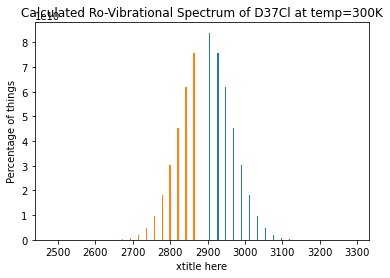

In [ ]:
# Lets now try to generate the spectrum
# We shall apply the proposed porbability matrix to an ensemble of molecules
# Then given some other paratemers, we may generate a Ro-Vib spectrum

n_particles = 1E12
pop_matrix *= n_particles
pop_matrix
#The absorbtion event (delta-nu=+1 and delta-J = +/- 1) will be weighted by
# number of molecules in each enegy state lets make an assumption that
# of all these molecules, 1/3 do not absorb, 1/3 absorb with an R transition
# and 1/3 absorb with a P transition

R_factor=0.3333333333
P_factor=0.3333333333
#sum of these two should not exceed one

#We will apply these factors to the population matrix to get populations which made transitions
n_R_transitions = pop_matrix[:4,:19]*R_factor
n_P_transitions = pop_matrix[:4,1:]*P_factor

#Lets only consider transitions from the first vibrational energy level
# to the second (the first row)
n_R_transitions = n_R_transitions[0]/n_particles
n_P_transitions = n_P_transitions[0]/n_particles

plt.bar(R_array_wvnm[0], n_R_transitions, width=3)
plt.bar(P_array_wvnm[0], n_P_transitions, width=3)
plt.xlabel('xtitle here')
plt.ylabel('Percentage of things')
plt.title('Calculated Ro-Vibrational Spectrum of D37Cl at temp='+str(temp)+'K')
plt.savefig('H35CL_'+str(temp)+'.png',dpi=400,orientation='landscape')
plt.show()

#### Fix the labels on the spectrum above

#### How well does the above spectrum match the actual spectrum of HCl?
https://webbook.nist.gov/cgi/cbook.cgi?ID=C7647010&Units=SI

Your Answer Here

#### What are two improvements that could be made to this method of generating rotational-vibrational spectra?

Your Answer Here

#### In true programming fashion, we can take the process we just created, and make a single function that generates an image and saves it.

In [ ]:
def make_a_spectrum(temp, mass1, mass2, k_force,
                    r_nuc, n_vib_levels, n_rot_levels,
                    n_particles, R_factor, P_factor,
                    molecule_name, save_image_name, show_plot):
    """
    Arguments:
    temp = int; temperature of the system in Kelvins
    mass1/2 = float; masses of the two atoms in amu's
    k_force = int/float; force constant of bond in N/m
    r_nuc = float; internuclear distance in angstroms
    n_vib_levels = int; number of levels
    n_rot_levels = int; number of levels
    n_particles = int; number of particles for boltzmann disctribution
    R/P_Factor = float; each between 0 and 1 not summing past 1
    molecule_name = str; some name for the molecule (D35Cl, H37Cl)
    save_image_name = str; filename for image, should have .png extension
    show_plot = bool; If True will enable plt.show() command
    
    Returns:
    the 4-tuple (R_array_wvnm[0], n_R_transitions, P_array_wvnm[0], n_P_transitions)
    saves plot based on extension of save_image_name
    """
    mass1 *= amutokg
    mass2 *= amutokg
    mu = reduced_mass(mass1, mass2)
    freq_vib = np.sqrt(k_force/mu)/(2*cons.pi)
    r_nuc = r_nuc * 1E-10
    moment_Inertia = mu*(r_nuc**2)
    vib_levels = make_vibrational_levels(n_vib_levels, freq_vib)
    rot_levels = make_rotational_levels(n_rot_levels, moment_Inertia)
    ener_matrix = np.ones((len(vib_levels),len(rot_levels))) # An empty matrix of the appropriate size is made first
    for i in range(len(vib_levels)):
        for j in range(len(rot_levels)):
            ener_matrix[i,j] = vib_levels[i]+rot_levels[j]
    R_array = make_R_array(ener_matrix)
    R_array_wvnm = np.ma.around((R_array/h)/(cons.c*100), 1)
    P_array = make_P_array(ener_matrix)
    P_array_wvnm = np.ma.around((P_array/h)/(cons.c*100), 1)
    pop_matrix=np.ones((len(ener_matrix), len(ener_matrix[0])))
    rot_probabilities = boltzmann_populate_levels(ener_matrix[0], temp)
    vib_probabilities = boltzmann_populate_levels(ener_matrix[:,:1].flatten(), temp)
    for i in range(len(vib_probabilities)):
        for j in range(len(rot_probabilities)):
            pop_matrix[i,j] = vib_probabilities[i]*rot_probabilities[j]
    n_particles = n_particles
    pop_matrix *= n_particles
    R_factor=R_factor
    P_factor=P_factor
    n_R_transitions = pop_matrix[:(len(vib_probabilities)-1),:(len(rot_probabilities)-1)]*R_factor
    n_P_transitions = pop_matrix[:(len(vib_probabilities)-1),1:]*P_factor
    n_R_transitions = n_R_transitions[0]/n_particles
    n_P_transitions = n_P_transitions[0]/n_particles
    print(R_array_wvnm[0], n_R_transitions)
    plt.bar(R_array_wvnm[0], n_R_transitions, width=3)
    plt.bar(P_array_wvnm[0], n_P_transitions, width=3)
    plt.xlabel('xtitle here')
    plt.ylabel('Percentage of something')
    plt.title('some kind of Spectrum of '+molecule_name+' at temp='+str(temp)+'K')
    plt.savefig(save_image_name,dpi=400,orientation='landscape')
    if show_plot:
        plt.show()
    return (R_array_wvnm[0], n_R_transitions, P_array_wvnm[0], n_P_transitions)

[2081.8 2092.8 2103.7 2114.7 2125.7 2136.7 2147.7 2158.6 2169.6 2180.6
 2191.6] [0.06402997 0.06074547 0.05467327 0.04668386 0.03781717 0.0290631
 0.02118972 0.0146568  0.00961798 0.00598769 0.00353643]


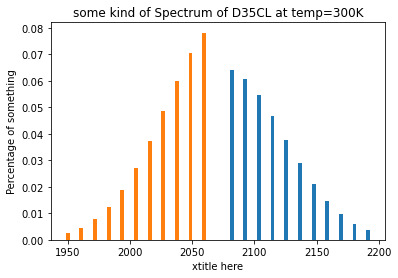

(masked_array(data=[2081.8, 2092.8, 2103.7, 2114.7, 2125.7, 2136.7, 2147.7,
                    2158.6, 2169.6, 2180.6, 2191.6],
              mask=False,
        fill_value=1e+20),
 array([0.06402997, 0.06074547, 0.05467327, 0.04668386, 0.03781717,
        0.0290631 , 0.02118972, 0.0146568 , 0.00961798, 0.00598769,
        0.00353643]),
 masked_array(data=[2059.8, 2048.8, 2037.9, 2026.9, 2015.9, 2004.9, 1993.9,
                    1983. , 1972. , 1961. , 1950. ],
              mask=False,
        fill_value=1e+20),
 array([0.07810132, 0.0702942 , 0.0600221 , 0.04862207, 0.03736684,
        0.02724393, 0.01884446, 0.01236597, 0.00769845, 0.00454683,
        0.00254768]))

In [ ]:
#H=1.007825, D=2.014102, Cl(35)=34.968853, and Cl(37)=36.965903
make_a_spectrum(300, 2.014102, 34.968853, 481, 1.27, 3, 12, 1E10, 0.35, 0.45, "D35CL", 'D35CL_300K_0.35R_0.45P.png', True)

#### The function make_a_spectrum() will return the paramters necessary to create the spectrum again, which is useful to overlay multiple spectra

In [ ]:
def plot_multiple(R_xlists, R_ylists, P_xlists, P_ylists, name_list, title_string):
    plt.clf()
    """
    will plot a spectra based on the output of make_a_spectrum()
    """
    dic = {}
    for i in range(len(name_list)):
        dic[name_list[i]]=(R_xlists[i], R_ylists[i], P_xlists[i], P_ylists[i])
    
    for name in dic:
        xlistR = dic[name][0]
        ylistR = dic[name][1]
        xlistP = dic[name][2]
        ylistP = dic[name][3]
        plt.bar(xlistR, ylistR, width=1)
        plt.bar(xlistP, ylistP, width=1)
    plt.xlabel('wavenumber (1/cm)')
    plt.ylabel('Percentage of particles')
    plt.title(title_string)
    plt.savefig(title_string+'.png',dpi=400,orientation='landscape')
    plt.show

[2908.7 2930.  2951.4 2972.7 2994.1] [0.10655618 0.09618747 0.07837872 0.05765243 0.03828044]
[2906.4 2927.8 2949.1 2970.4 2991.7] [0.10649822 0.09615004 0.0783725  0.05767466 0.03831894]


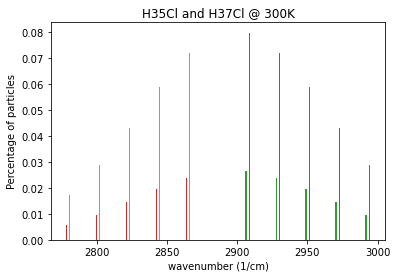

In [ ]:
name_list = ['H35Cl','H37Cl']
R_xlists = []
R_ylists = []
P_xlists = []
P_ylists = []
#Chlorine is about 35Cl:37Cl at a 3:1 ratio (ie 75% is amu~35)
per_35cl = 0.75
per_37cl = 0.25
#H=1.007825, D=2.014102, Cl(35)=34.968853, and Cl(37)=36.965903
tuples = [make_a_spectrum(300, 1.007825, 34.968853, 481, 1.27, 2, 6, 1E10, 0.4, 0.4, "H35CL", 'H35CL_300K_0.4R_0.4P.png', False),
          make_a_spectrum(300, 1.007825, 36.965903, 481, 1.27, 2, 6, 1E10, 0.4, 0.4, "H37CL", 'H37CL_300K_0.4R_0.4P.png', False)]

for i in range(len(tuples)):
    R_xlists.append(tuples[i][0])
    P_xlists.append(tuples[i][2])
    if i == 0:
        #H35Cl
        R_ylists.append(tuples[i][1]*per_35cl)
        P_ylists.append(tuples[i][3]*per_35cl)
    elif i == 1:
        #H37Cl (second from list)
        R_ylists.append(tuples[i][1]*per_37cl)
        P_ylists.append(tuples[i][3]*per_37cl)
#We will reflect the natural abuncdances of each with constants
plot_multiple(R_xlists, R_ylists, P_xlists, P_ylists, name_list, 'H35Cl and H37Cl @ 300K')
    

## Fitting a Real Spectrum


In [43]:
#Obtain jcampdx from NIST, a common IR file format at
# https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C7647010&Index=0&Type=IR
# Save it to your google drive and point to it here
from IPython.testing import test
from google.colab import drive
drive.mount('/content/drive')
##################################################################
hcl_jcamp = '/content/drive/MyDrive/CHANGEME'

Mounted at /content/drive


## The Assignment is complete by providing answers to all questions in the notebook, and by generating the following spectra in cells below.
### H35Cl, H37Cl, D35Cl, D37Cl @ 300 K
### H35Cl and D35Cl @ 1000K
### A Double graph of D35Cl and D37Cl as shown above for H35Cl and H37Cl @ 300K

In [ ]:
make_a_spectrum(temp, mass1, mass2, k_force, r_nuc, n_vib_levels, n_rot_levels, n_particles, R_factor, P_factor, molecule_name, save_image_name, show_plot)

In [ ]:
name_list = ['H35Cl','H37Cl']
R_xlists = []
R_ylists = []
P_xlists = []
P_ylists = []
#Chlorine is about 35Cl:37Cl at a 3:1 ratio (ie 75% is amu~35)
per_35cl = 0.75
per_37cl = 0.25
#H=1.007825, D=2.014102, Cl(35)=34.968853, and Cl(37)=36.965903
tuples = [make_a_spectrum(300, 1.007825, 34.968853, 481, 1.27, 2, 6, 1E10, 0.4, 0.4, "H35CL", 'H35CL_300K_0.4R_0.4P.png', False),
          make_a_spectrum(300, 1.007825, 36.965903, 481, 1.27, 2, 6, 1E10, 0.4, 0.4, "H37CL", 'H37CL_300K_0.4R_0.4P.png', False)]

for i in range(len(tuples)):
    R_xlists.append(tuples[i][0])
    P_xlists.append(tuples[i][2])
    if i == 0:
        #H35Cl
        R_ylists.append(tuples[i][1]*per_35cl)
        P_ylists.append(tuples[i][3]*per_35cl)
    elif i == 1:
        #H37Cl (second from list)
        R_ylists.append(tuples[i][1]*per_37cl)
        P_ylists.append(tuples[i][3]*per_37cl)
#We will reflect the natural abuncdances of each with constants
plot_multiple(R_xlists, R_ylists, P_xlists, P_ylists, name_list, 'H35Cl and H37Cl @ 300K')

### Boltzmann Distribution
The boltzmann distribution assigns a probability to an energy level based on the temperature:
$$
P_i = e^{\frac{-E_i}{k_b*Temp}}
$$

In [ ]:
def boltzmann_populate_levels(energy_levels, temperature):
    """
    Energy-levels must be a list, and temperature an int, in kelvin
    Returns a normalized boltzmann population list
    """
    probability_list = np.exp(-1*energy_levels/(kb*temperature))
    #This must now be normalized such that all sum of all is 1
    summ = sum(probability_list)
    normalized_proba_list = [x/summ for x in probability_list]
    return normalized_proba_list

In [ ]:
boltzmann_populate_levels(make_vibrational_levels(10, freq_vib), temp)

[0.9999990211532601,
 9.788457816731432e-07,
 9.58140002171518e-13,
 9.37872217411053e-19,
 9.180331623750116e-25,
 8.986137680319903e-31,
 8.7960515719016e-37,
 8.6099864043924e-43,
 8.427857121783057e-49,
 8.249580467276225e-55]

#### Uncomment the command in the cell above, and write the probabilities of the diatomic molecule to be found in the ground and 1st, 3rd, and 8th, excited vibrational states as percentages.  How great of an effect does temperature have on these probabilities?

Your Answer Here

In [ ]:
# Now we begin to calculate the rotational part
# to do this part, we will now need to define the internuclear distance r_nuc
r_nuc = 1.27E-10 #1.27 angstroms

# Since the reduced mass is known, the moment of inertia is readily calculable
mom_I = mu*(r_nuc**2)

#Unlike vibrational states, rotational states may occupy the energy level of 0
def make_rotational_levels(n_states, moment_I):
    rot_levels = []
    prefactor = (cons.h**2)/(8*(cons.pi**2)*moment_I)
    
    for i in range(n_states):
        level_eng = prefactor*i*(i+1)
        rot_levels.append(level_eng)
    rot_levels = np.array(rot_levels)
    return rot_levels

#Now lets see the first 10 rotational energies
for i in make_rotational_levels(10, mom_I):
    print(i, "joules||", i/evtojoule, "electron volts||", i/(h*cons.c*100), "inv-cm")

0.0 joules|| 0.0 electron volts|| 0.0 inv-cm
4.2338316064518654e-22 joules|| 0.0026425498391408108 electron volts|| 21.313601834225302 inv-cm
1.2701494819355595e-21 joules|| 0.007927649517422431 electron volts|| 63.9408055026759 inv-cm
2.540298963871119e-21 joules|| 0.015855299034844863 electron volts|| 127.8816110053518 inv-cm
4.2338316064518656e-21 joules|| 0.02642549839140811 electron volts|| 213.13601834225304 inv-cm
6.3507474096777984e-21 joules|| 0.039638247587112166 electron volts|| 319.7040275133795 inv-cm
8.891046373548917e-21 joules|| 0.055493546621957025 electron volts|| 447.58563851873134 inv-cm
1.1854728498065223e-20 joules|| 0.0739913954959427 electron volts|| 596.7808513583084 inv-cm
1.5241793783226714e-20 joules|| 0.09513179420906918 electron volts|| 767.2896660321109 inv-cm
1.9052242229033394e-20 joules|| 0.11891474276133648 electron volts|| 959.1120825401385 inv-cm


In [ ]:
boltzmann_populate_levels(make_rotational_levels(10, mom_I), temp)

[0.25219167890710537,
 0.22768680840987598,
 0.18558894481584326,
 0.13657570538060954,
 0.09074065679781504,
 0.054429895589523505,
 0.029476790892336846,
 0.014412191246179023,
 0.006361901619978108,
 0.002535426340733305]

#### Uncomment the command in the cell above, and write the probabilities of the diatomic molecule to be found in the ground and 1st, 3rd, and 8th, excited rotational states as percentages.  How great of an effect does temperature have on these probabilities?

Your Answer Here

#### What difference do you notice in the probabilities associated with populating vibrational states, versus rotational states?  Explain this difference.

Your Answer Here

In [ ]:
foo = [2,4,6]
bar = [3,9]
mat = np.ones((len(bar), len(foo)))
for i in range(len(bar)):
    for j in range(len(foo)):
        mat[i,j] = bar[i] + foo[j]
mat

array([[ 5.,  7.,  9.],
       [11., 13., 15.]])

In [ ]:
# Now we begin the process of generating a spectrum, lets define new vibrational levels and rotational levels
vib_levels = make_vibrational_levels(5, freq_vib)
rot_levels = make_rotational_levels(20, mom_I)

# We will generate a 2-D array of energy levels, with rows as
# vibrational levels, and columns as rotational states
ener_matrix = np.ones((len(vib_levels),len(rot_levels))) # An empty matrix of the appropriate size is made first
#We will essentially apply terms 1 and 3 of equation 4 pg 417
for i in range(len(vib_levels)):
    for j in range(len(rot_levels)):
        ener_matrix[i,j] = vib_levels[i]+rot_levels[j]
print(ener_matrix)# E=hf and E(in 1/s) /(cm/s) gives 1/cm 
ener_matrix_in_wvnm = (ener_matrix/h)/(cons.c*100)
ener_matrix_in_wvnm

[[2.86558341e-20 2.90792172e-20 2.99259836e-20 3.11961330e-20
  3.28896657e-20 3.50065815e-20 3.75468804e-20 4.05105626e-20
  4.38976279e-20 4.77080763e-20 5.19419079e-20 5.65991227e-20
  6.16797206e-20 6.71837017e-20 7.31110659e-20 7.94618134e-20
  8.62359439e-20 9.34334577e-20 1.01054355e-19 1.09098635e-19]
 [8.59675022e-20 8.63908854e-20 8.72376517e-20 8.85078012e-20
  9.02013338e-20 9.23182496e-20 9.48585486e-20 9.78222307e-20
  1.01209296e-19 1.05019744e-19 1.09253576e-19 1.13910791e-19
  1.18991389e-19 1.24495370e-19 1.30422734e-19 1.36773482e-19
  1.43547612e-19 1.50745126e-19 1.58366023e-19 1.66410303e-19]
 [1.43279170e-19 1.43702554e-19 1.44549320e-19 1.45819469e-19
  1.47513002e-19 1.49629918e-19 1.52170217e-19 1.55133899e-19
  1.58520964e-19 1.62331413e-19 1.66565244e-19 1.71222459e-19
  1.76303057e-19 1.81807038e-19 1.87734402e-19 1.94085150e-19
  2.00859280e-19 2.08056794e-19 2.15677691e-19 2.23721971e-19]
 [2.00590839e-19 2.01014222e-19 2.01860988e-19 2.03131137e-19
  2.0

array([[ 1442.56809072,  1463.88169255,  1506.50889622,  1570.44970173,
         1655.70410906,  1762.27211823,  1890.15372924,  2039.34894208,
         2209.85775675,  2401.68017326,  2614.8161916 ,  2849.26581178,
         3105.02903379,  3382.10585764,  3680.49628331,  4000.20031083,
         4341.21794018,  4703.54917136,  5087.19400437,  5492.15243922],
       [ 4327.70427216,  4349.017874  ,  4391.64507766,  4455.58588317,
         4540.8402905 ,  4647.40829968,  4775.28991068,  4924.48512352,
         5094.99393819,  5286.8163547 ,  5499.95237304,  5734.40199322,
         5990.16521523,  6267.24203908,  6565.63246476,  6885.33649227,
         7226.35412162,  7588.6853528 ,  7972.33018581,  8377.28862066],
       [ 7212.8404536 ,  7234.15405544,  7276.78125911,  7340.72206461,
         7425.97647194,  7532.54448112,  7660.42609212,  7809.62130496,
         7980.13011963,  8171.95253614,  8385.08855449,  8619.53817466,
         8875.30139667,  9152.37822052,  9450.7686462 ,  9770.

#### Based on equation 4 on page 417 of the text, the energy of being in a given vibrational and rotational state can defined as as the 
$$
 T(\nu,J) = E_{vib} + E_{rot} = h\nu_0(\nu+\frac{1}{2}) + \frac{h^2}{8\pi^2I}J(J+1)
$$

#### How is this definition different from the book?  Is it still valid?

Your Answer Here

###